#### Описание полей датасета
orders
    Id - id заказа 
	created_at - timestamp создания заказа на сайте   
	delivery_window_id - id слота доставки  
	item_total - Сумма всех товаров в корзине (средний чек)   
	promo_total - Сумма промо-кода на товары в корзине  
	cost - Изначальная стоимость доставки  
	total_cost - Финальная стоимость доставки (отличается, если был применен промо-код на доставку. Если промокода не было, то cost=total_cost)  
	ship_address_id - id адреса доставки (ключ к addresses.id)  
	shipped_at - timestamp доставки заказа  
	state - состояние доставки (shipped, canceled и тд)  
	store_id - id магазина  
	total_quantity - Количество единиц товара  
	total_weight - Вес заказа , г.  
	user_id	id - пользователя  
delivery_windows  
    id - id слота доставки (ключ к orders.delivery_window_id)  
	starts_at -	timestamp начала слота доставки  
	ends_at - timestamp конца слота доставки  
	store_id - ID магазина  
stores
    id - ID магазина  
	city - ID города  
	retailer_id - ID ритейлера  
addresses
    id - ID адреса (ключ к orders.ship_address_id)  
	lat - latitude  
	lon - longitude  
replacements  
    item_id - id товара, который был заменен  
	order_id - id заказа, в котором была замена  
	state - статус (замена)  
cancellations  
    item_id  - id товара, который был отменен  
	order_id - id заказа, в котором была отмена  
	state - статус (отмена)  
    


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('orders.csv', sep=';')

In [4]:
df.head()

,city,created_at,delivery_window_id,elevator,ends_at,floor,id,id (addresses),id (delivery_windows),id (stores),item_id,item_id (cancellations),lat,lon,order_id,order_id (cancellations),retailer_id,ship_address_id,shipped_at,starts_at,state,state (cancellations),state (replacements),store_id,store_id (delivery_windows),time_zone,user_id,cost,countOfOrders,distinct_orders,item_total,promo_total,total_cost,total_quantity,total_weight
0,1.0,11.07.2018 21:55:37,190792.0,passenger,12.07.2018 21:00:00,1,3544664.0,81323.0,190792.0,11.0,NaN,8543539.0,"55,7354883","37,4025934",NaN,3544664.0,1.0,81323.0,12.07.2018 19:35:03,12.07.2018 19:00:00,shipped,canceled,NaN,11.0,11.0,Europe/Moscow,27769.0,299,0,0,2903.0,0,299,34.0,17470.0
1,1.0,11.07.2018 21:55:37,190792.0,passenger,12.07.2018 21:00:00,1,3544664.0,81323.0,190792.0,11.0,NaN,8543399.0,"55,7354883","37,4025934",NaN,3544664.0,1.0,81323.0,12.07.2018 19:35:03,12.07.2018 19:00:00,shipped,canceled,NaN,11.0,11.0,Europe/Moscow,27769.0,299,0,0,2903.0,0,299,34.0,17470.0
2,1.0,11.07.2018 21:55:37,190792.0,passenger,12.07.2018 21:00:00,1,3544664.0,81323.0,190792.0,11.0,NaN,8543543.0,"55,7354883","37,4025934",NaN,3544664.0,1.0,81323.0,12.07.2018 19:35:03,12.07.2018 19:00:00,shipped,canceled,NaN,11.0,11.0,Europe/Moscow,27769.0,299,0,0,2903.0,0,299,34.0,17470.0
3,1.0,11.07.2018 21:55:37,190792.0,passenger,12.07.2018 21:00:00,1,3544664.0,81323.0,190792.0,11.0,NaN,8543522.0,"55,7354883","37,4025934",NaN,3544664.0,1.0,81323.0,12.07.2018 19:35:03,12.07.2018 19:00:00,shipped,canceled,NaN,11.0,11.0,Europe/Moscow,27769.0,299,0,0,2903.0,0,299,34.0,17470.0
4,1.0,11.07.2018 21:55:37,190792.0,passenger,12.07.2018 21:00:00,1,3544664.0,81323.0,190792.0,11.0,NaN,8543539.0,"55,7354883","37,4025934",NaN,3544664.0,1.0,81323.0,12.07.2018 19:35:03,12.07.2018 19:00:00,shipped,canceled,NaN,11.0,11.0,Europe/Moscow,27769.0,299,0,0,2903.0,0,299,34.0,17470.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4093180 entries, 0 to 4093179
Data columns (total 35 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   city                         float64
 1   created_at                   object 
 2   delivery_window_id           float64
 3   elevator                     object 
 4   ends_at                      object 
 5   floor                        object 
 6   id                           float64
 7   id (addresses)               float64
 8   id (delivery_windows)        float64
 9   id (stores)                  float64
 10  item_id                      float64
 11  item_id (cancellations)      float64
 12  lat                          object 
 13  lon                          object 
 14  order_id                     float64
 15  order_id (cancellations)     float64
 16  retailer_id                  float64
 17  ship_address_id              float64
 18  shipped_at                   object 
 19  

#### Немного почистим данные удалив ненужные поля, повторяющиеся значения, заказы которые были отменены..

In [6]:
#поля для удаления
to_drop = ['countOfOrders', 'distinct_orders']

In [7]:
df = df.drop(columns=to_drop)

In [8]:
df['id'].isna().sum() # Эти строки будем удалять

5897

In [9]:
df.dropna(subset=['id'], how='all', inplace = True) 

In [10]:
# Повторяющиеся строки 
df.duplicated(subset='id', keep='first').sum()

3755140

In [11]:
# Удаляем повторяющиеся строки
df = df.drop_duplicates(subset=['id'], keep='last')

In [12]:
df[["shipped_at", "created_at", "ends_at", "starts_at"]] =\
df[["shipped_at", "created_at", "ends_at", "starts_at"]].apply(pd.to_datetime) # Преобразуем object to datetime

In [13]:
# Object to float
df[['cost', 'total_cost']] = df[['cost', 'total_cost']].apply(pd.to_numeric, errors='coerce')

In [14]:
#Количественные переменные
quant_var = ['cost', 'total_cost', 'item_total', 'total_quantity', 'total_weight'] 

In [15]:
df[quant_var].describe()

,cost,total_cost,item_total,total_quantity,total_weight
count,332128.000000,332128.000000,332143.000000,332143.000000,3.321430e+05
mean,258.339234,189.196819,4927.418645,44.289351,2.697661e+04
std,172.266916,175.255818,5538.327433,75.252129,4.196525e+04
min,0.000000,-298.000000,0.000000,0.000000,0.000000e+00
25%,199.000000,0.000000,2573.000000,18.000000,9.710000e+03
50%,299.000000,199.000000,3881.000000,31.000000,1.822100e+04
75%,299.000000,299.000000,5816.000000,50.000000,3.200000e+04
max,9500.000000,9500.000000,480746.000000,7728.000000,3.864000e+06


In [16]:
df.loc[df.total_cost < 0]

,city,created_at,delivery_window_id,elevator,ends_at,floor,id,id (addresses),id (delivery_windows),id (stores),item_id,item_id (cancellations),lat,lon,order_id,order_id (cancellations),retailer_id,ship_address_id,shipped_at,starts_at,state,state (cancellations),state (replacements),store_id,store_id (delivery_windows),time_zone,user_id,cost,item_total,promo_total,total_cost,total_quantity,total_weight
589410,1.0,2018-09-15 12:18:13,264264.0,NaN,2018-10-10 18:00:00,-,3727453.0,940822.0,264264.0,21.0,NaN,10886341.0,"55,763787","37,5479152",NaN,3727453.0,1.0,940822.0,2018-10-10 17:31:12,2018-10-10 16:00:00,shipped,canceled,NaN,21.0,21.0,Europe/Moscow,4585.0,497.0,3478.0,0,-99.0,64.0,17877.0
1192009,1.0,2018-09-18 22:45:05,247582.0,NaN,2018-09-20 13:00:00,2,3641402.0,858935.0,247582.0,21.0,10203446.0,10203397.0,"55,7545527","37,6042215",3641402.0,3641402.0,1.0,858935.0,2018-09-20 12:11:22,2018-09-20 11:00:00,shipped,canceled,replaced,21.0,21.0,Europe/Moscow,19214.0,299.0,1755.0,0,-99.0,31.0,35228.0
1857120,1.0,2018-06-30 12:59:43,188544.0,NaN,2018-08-07 15:00:00,1,3550660.0,147074.0,188544.0,68.0,8468250.0,8468269.0,"55,6130965","37,6994904",3550660.0,3550660.0,1.0,147074.0,2018-08-07 14:09:07,2018-08-07 13:00:00,shipped,canceled,replaced,68.0,68.0,Europe/Moscow,17157.0,398.0,4457.0,0,-298.0,55.0,99600.0
3680679,1.0,2018-09-19 04:12:17,247485.0,passenger,2018-09-20 15:00:00,13,3449644.0,274349.0,247485.0,11.0,NaN,10206427.0,"55,7354736","37,413209",NaN,3449644.0,1.0,274349.0,2018-09-20 14:36:11,2018-09-20 13:00:00,shipped,canceled,NaN,11.0,11.0,Europe/Moscow,60247.0,299.0,3574.0,0,-148.0,43.0,35357.0


Вывод статистики показал, что в сумме доставки есть отрицательные значения. Предположим, что по каким то обстоятельствам, доставку вычли из суммы заказа или из зп курьера.

Посмотрим на распределения количественных переменных

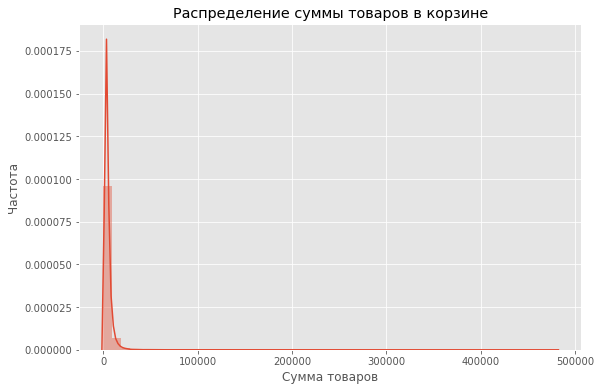

In [17]:
plt.figure(figsize=(9,6))
sns.distplot(df['item_total'])
plt.title('Распределение суммы товаров в корзине')
plt.xlabel('Сумма товаров')
plt.ylabel('Частота')
plt.show()

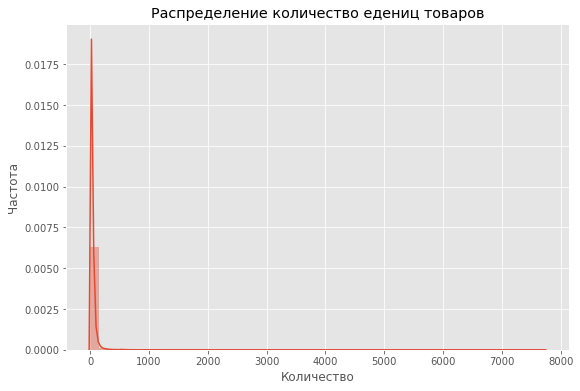

In [18]:
plt.figure(figsize=(9,6))
sns.distplot(df['total_quantity'])
plt.title('Распределение количество едениц товаров')
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.show()

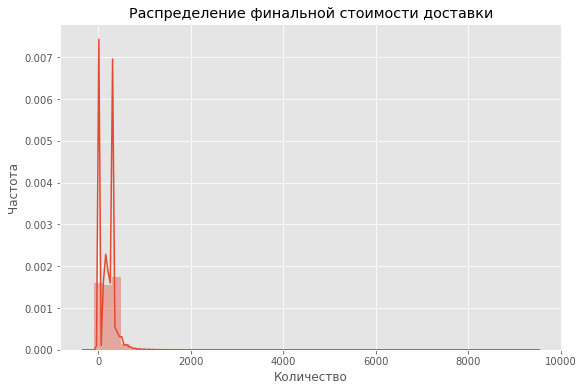

In [19]:
plt.figure(figsize=(9,6))
sns.distplot(df['total_cost'])
plt.title('Распределение финальной стоимости доставки')
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.show()

В количественных переменных присутсвуют "выбросы". 

In [20]:
# посмотрим на переменную state
df['state'].value_counts(normalize = True)

shipped     0.999943
canceled    0.000036
pending     0.000021
Name: state, dtype: float64

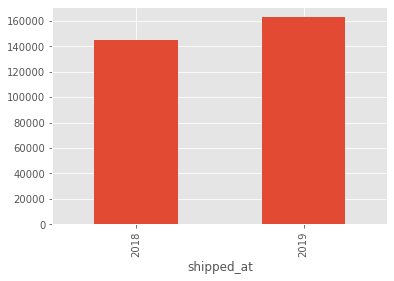

In [21]:
# Посмотрим на диапазон времени
df.groupby(df.shipped_at.dt.year)['shipped_at'].nunique().plot(kind='bar')

### Анализ основных KPI

#### Annual Revenue

In [22]:
df.groupby(df.shipped_at.dt.year)['item_total'].sum()

shipped_at
2018    719347616.0
2019    917259995.0
Name: item_total, dtype: float64

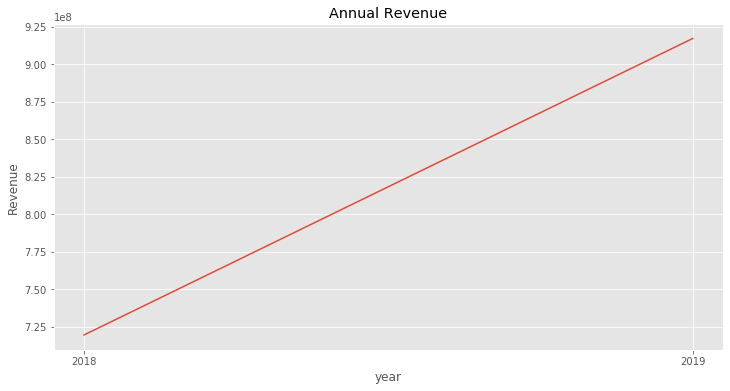

In [23]:
#Annual Revenue
plt.figure(figsize=(12,6))
df.groupby(df.shipped_at.dt.year)['item_total'].sum().plot()
plt.xlabel('year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2018,2020,1))
plt.show()


Данные за 2 года показывают существенную динамику роста. Далее посмотрим на ежемесячный доход

#### Monthly Revenue

In [24]:
monthly_revenue = df.groupby([df.shipped_at.dt.year,df.shipped_at.dt.month]).agg({'item_total': "sum"})

In [25]:
monthly_revenue.index = monthly_revenue.index.set_names(['year', 'month'])

In [26]:
monthly_revenue.reset_index(inplace=True)

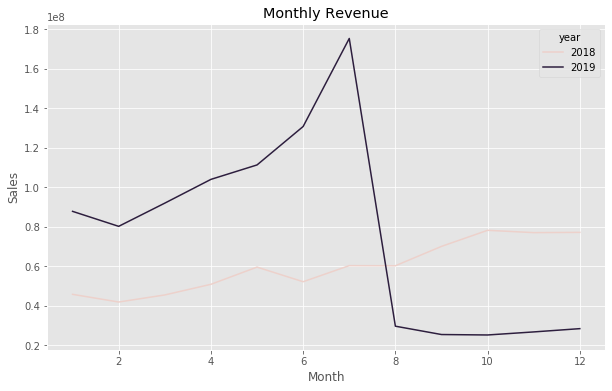

In [27]:
#Monthly Revenue
plt.figure(figsize=(10,6))
sns.lineplot(x="month", y='item_total',hue="year", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

В 2019 наблюдается аномальный упадок в продажах либо существенная потеря в данных.

#### Ежемесячный темп роста

In [28]:
monthly_revenue['monthly_growth'] = monthly_revenue['item_total'].pct_change()
monthly_revenue.head()

,year,month,item_total,monthly_growth
0,2018,1,45839557.0,NaN
1,2018,2,41949176.0,-0.084870
2,2018,3,45534541.0,0.085469
3,2018,4,50916198.0,0.118188
4,2018,5,59622261.0,0.170988


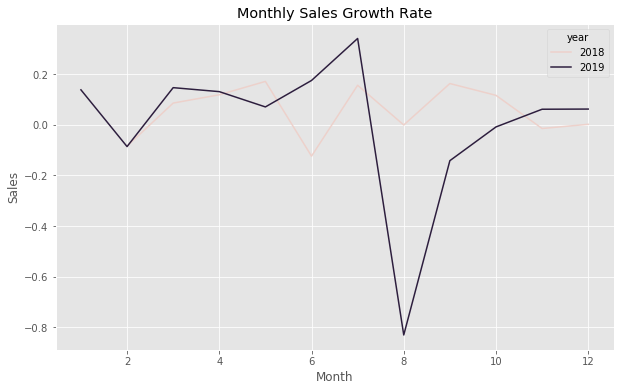

In [29]:
#Monthly Sales Growth Rate
plt.figure(figsize=(10,6))
sns.lineplot(x="month", y="monthly_growth",hue="year", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')
plt.show()

По данному графику можно оценить тренды сезонности для прогнозирования продаж. Так же видим аномальный упадок в 8 месяцу 2019г.

#### Топ-10 клиентов

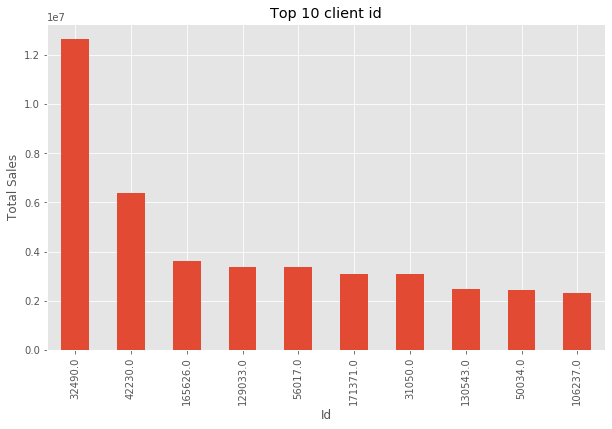

In [59]:
plt.figure(figsize=(10,6))
top_stores = df.groupby(['user_id'])['item_total'].sum().sort_values(ascending=False)
top_stores.iloc[:10].plot(kind = 'bar')
plt.title('Top 10 client id')
plt.xlabel('Id')
plt.ylabel('Total Sales')
plt.show()

#### Активность клиентов по месяцам

<Figure size 720x576 with 0 Axes>

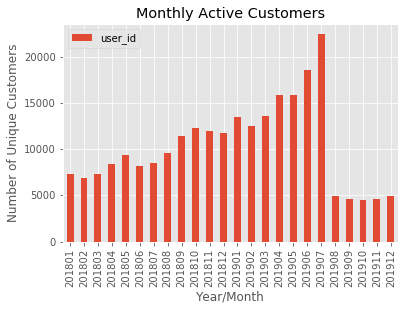

In [31]:
plt.figure(figsize=(10,8))
df['year_month'] = df.shipped_at.dt.year.map(str)+df.shipped_at.dt.month.map(str).map(lambda x: x.rjust(2,'0'))
monthly_active = df.groupby(['year_month'])['user_id'].nunique().reset_index()
monthly_active.plot(kind='bar', x='year_month', y='user_id')
plt.title('Monthly Active Customers')
plt.xlabel('Year/Month')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.show();

До 08.2019 видим рост клиенсткой активности, далее как было сказано выше, наблюдается аномалия в данных после 07.2019

#### Средняя сумма заказа

In [32]:
average_revenue = df.groupby([df.shipped_at.dt.year,df.shipped_at.dt.month]).agg({'item_total': "mean"})
average_revenue.index = average_revenue.index.set_names(['year', 'month'])
average_revenue.reset_index(inplace=True)

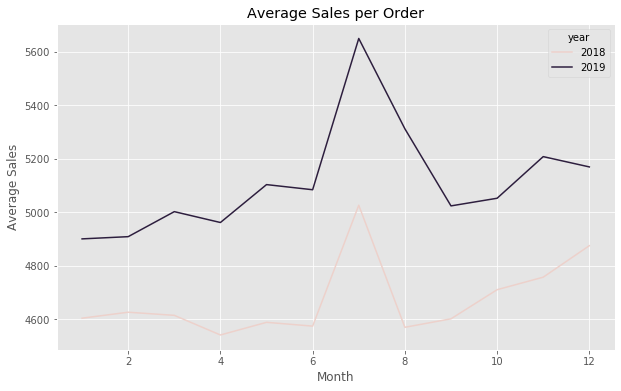

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(x="month", y="item_total",hue="year", data=average_revenue)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Order')
plt.show()

В 7-ом месяце, наблюдаем аномальный рост средей покупки

#### Темпы роста новых клиентов

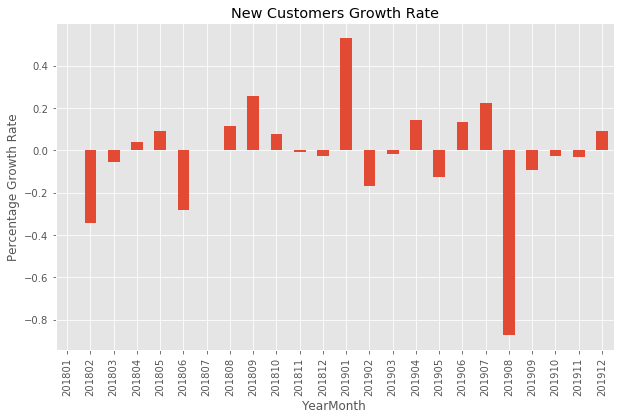

In [34]:
#New Customers Growth Rate
df_first_purchase = df.groupby('user_id').year_month.min().reset_index()
df_first_purchase.columns = ['user_id','FirstPurchaseDate']
plt.figure(figsize=(10,6))
df_first_purchase.groupby(['FirstPurchaseDate'])['user_id'].nunique().pct_change().plot(kind='bar')
plt.title('New Customers Growth Rate')
plt.xlabel('YearMonth')
plt.ylabel('Percentage Growth Rate')
plt.show()

Под новыми клиентами подразумеваются клиенты, которые сделали первую покупку в нашем временном окне.
В январе 2019 наивысший прирост новых клиентов, скорее всего, объясняемые длинными выходными и праздниками.

### RFM-analysis

RFM-анализ — метод анализа, позволяющий сегментировать клиентов по частоте и сумме покупок и выявлять тех клиентов, которые приносят больше денег.

Аббревиатура RFM расшифровывается:

Recency — давность (как давно ваши клиенты что-то у вас покупали);  
Frequency — частота (как часто они у вас покупают);  
Monetary — деньги (общая сумма покупок).

In [35]:
df['order_date'] = [d.date() for d in df['shipped_at']]
df.head()

,city,created_at,delivery_window_id,elevator,ends_at,floor,id,id (addresses),id (delivery_windows),id (stores),item_id,item_id (cancellations),lat,lon,order_id,order_id (cancellations),retailer_id,ship_address_id,shipped_at,starts_at,state,state (cancellations),state (replacements),store_id,store_id (delivery_windows),time_zone,user_id,cost,item_total,promo_total,total_cost,total_quantity,total_weight,year_month,order_date
7,1.0,2018-11-07 21:55:37,190792.0,passenger,2018-12-07 21:00:00,1,3544664.0,81323.0,190792.0,11.0,NaN,8543522.0,"55,7354883","37,4025934",NaN,3544664.0,1.0,81323.0,2018-12-07 19:35:03,2018-12-07 19:00:00,shipped,canceled,NaN,11.0,11.0,Europe/Moscow,27769.0,299.0,2903.0,0,299.0,34.0,17470.0,201812,2018-12-07
10,1.0,2018-06-26 10:52:31,185399.0,passenger,2018-04-07 13:00:00,9,3472609.0,147576.0,185399.0,14.0,NaN,8376952.0,"55,6452012","37,4879612",NaN,3472609.0,1.0,147576.0,2018-04-07 12:33:45,2018-04-07 11:00:00,shipped,canceled,NaN,14.0,14.0,Europe/Moscow,20549.0,199.0,6893.0,0,199.0,26.0,5820.0,201804,2018-04-07
13,1.0,2018-11-07 14:37:12,190023.0,NaN,2018-11-07 21:00:00,1,3449568.0,241160.0,190023.0,8.0,8536044.0,8536067.0,"55,823163","37,828648",3449568.0,3449568.0,1.0,241160.0,2018-11-07 21:01:10,2018-11-07 19:00:00,shipped,canceled,replaced,8.0,8.0,Europe/Moscow,32010.0,299.0,4112.0,0,299.0,30.0,12360.0,201811,2018-11-07
37,1.0,2018-10-06 14:26:21,224172.0,NaN,2018-08-23 17:00:00,13,3531498.0,244158.0,224172.0,10.0,9340055.0,9339810.0,"55,8587156","37,4824748",3531498.0,3531498.0,1.0,244158.0,2018-08-23 17:23:04,2018-08-23 15:00:00,shipped,canceled,replaced,10.0,10.0,Europe/Moscow,40273.0,299.0,5055.0,0,299.0,42.0,13875.0,201808,2018-08-23
41,1.0,2019-07-27 20:25:47,624251.0,NaN,2019-07-28 15:00:00,17,3028559.0,287030.0,624251.0,12.0,NaN,NaN,"55,7616328","37,6825415",NaN,NaN,1.0,287030.0,2019-07-28 13:52:58,2019-07-28 13:00:00,shipped,NaN,NaN,12.0,12.0,Europe/Moscow,631698.0,249.0,1168.0,0,98.0,25.0,2500.0,201907,2019-07-28


In [36]:
# Calculate Recency, Frequency and Monetary value for each customer
latest_date = df['order_date'].max() + dt.timedelta(days=1) #latest date in the data set
df_RFM = df.groupby(['user_id']).agg({
    'order_date': lambda x: (latest_date - x.max()).days,
    'id': 'count',
    'item_total':'sum'})\
    .rename(columns={'order_date':'Recency',
                     'id':'Frequency',
                     'item_total':'Monetary_value'})

In [37]:
df_RFM.head()

,Recency,Frequency,Monetary_value
user_id,,,
31.0,2,49,604857.0
45.0,36,40,101893.0
60.0,522,1,6644.0
63.0,442,1,5215.0
97.0,402,8,35769.0


Разделим клиентов на 3 сегмента. Количество сегментов выбрал рандомно.

Recency/Frequency/MonetaryValue : Level 3> Level 2 > Level 1

Lower the recency, higher the Recency level  
Higher the number of orders, higher the Frequency level  
Higher the monetary value, higher the MonetaryValue level  

In [38]:
MonetaryValue_quartile = pd.qcut(df_RFM['Monetary_value'], q=3, labels=range(1,4))
Recency_quartile = pd.qcut(df_RFM['Recency'], q=3, labels=list(range(3, 0, -1)))
Frequency_quartile = pd.qcut(df_RFM['Frequency'], q=[.5, .75, 1.], labels=range(1,3))

df_RFM['R'] = Recency_quartile
df_RFM['F'] = Frequency_quartile
df_RFM['M'] = MonetaryValue_quartile

df_RFM.head()

,Recency,Frequency,Monetary_value,R,F,M
user_id,,,,,,
31.0,2,49,604857.0,3,2,3
45.0,36,40,101893.0,3,2,3
60.0,522,1,6644.0,1,1,2
63.0,442,1,5215.0,1,1,2
97.0,402,8,35769.0,1,2,3


#### RFM-score

In [39]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary_value,R,F,M,RFM_Score
user_id,,,,,,,
31.0,2,49,604857.0,3,2,3,8
45.0,36,40,101893.0,3,2,3,8
60.0,522,1,6644.0,1,1,2,4
63.0,442,1,5215.0,1,1,2,4
97.0,402,8,35769.0,1,2,3,6


RFM Score > 7 - High Value Customer  
RFM SCore < 7 and RFM Score >= 4 - Mid Value Customer  
RFM Score < 4 - Low Value Customer  

In [40]:
#Naming Levels
def rfm_level(df):
    if np.bool(df['RFM_Score'] >= 7):
        return 'High Value Customer'
    elif np.bool((df['RFM_Score'] < 7) & (df['RFM_Score'] >= 4)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'


df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

df_RFM.head()

,Recency,Frequency,Monetary_value,R,F,M,RFM_Score,RFM_Level
user_id,,,,,,,,
31.0,2,49,604857.0,3,2,3,8,High Value Customer
45.0,36,40,101893.0,3,2,3,8,High Value Customer
60.0,522,1,6644.0,1,1,2,4,Mid Value Customer
63.0,442,1,5215.0,1,1,2,4,Mid Value Customer
97.0,402,8,35769.0,1,2,3,6,Mid Value Customer


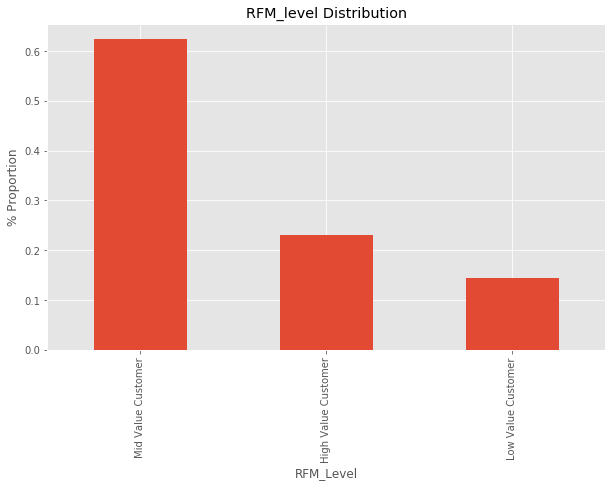

In [41]:
plt.figure(figsize=(10,6))
df_RFM['RFM_Level'].value_counts(normalize = True).plot(kind='bar')
plt.title('RFM_level Distribution')
plt.xlabel('RFM_Level')
plt.ylabel('% Proportion')
plt.show()

#### Посмотрим на средние для каждой RFM группы

In [42]:
rfm_level_agg = df_RFM.groupby(['RFM_Level']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary_value':['mean','count']}).round(1)

print(rfm_level_agg)

                    Recency Frequency Monetary_value       
                       mean      mean           mean  count
RFM_Level                                                  
High Value Customer   127.6       7.7        42930.7  27365
Low Value Customer    521.2       1.0         1814.9  17173
Mid Value Customer    302.1       1.4         5831.0  73854


Таким образом разделив клиентов на группу можно выстраивать политику лояльности соответсвующим клиентам